<a href="https://colab.research.google.com/github/Annaseanna/Simulacion-de-sistemas/blob/main/Practica3_Simulacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Practica 4 - Simulacion de sistemas**
***Anna Ospina Bedoya***

# **1. Simulación de Montecarlo**

***1.3. Pruebas de aleatoriedad***

Para esta práctica se evaluará la aleatoriedad de las loterías tradicionales actuales usando un conjunto de resultados de los premios secos de la lotería local en 2022. Además, se evaluará la aleatoriedad de una secuencia generada con la función RANDOM() de excel

Objetivos de aprendizaje:

Determinar si una secuencia de números es aleatoria usando pruebas de aleatoriedad.

***1. Aleatoriedad de los resultados de la lotería local***

Los datos a usar se obtuvieron de:

https://www.loteriasdehoy.com/loteria-medellin-10-junio-2022-sorteo-4630

Se tomaron únicamente los números de los billetes, los cuales tienen 4 cifras. Estos datos se pueden descargar, en archivo de texto separado por comas y sin encabezado de:

https://docs.google.com/spreadsheets/d/1ywaXlY3u5HL0ys-XHRqEfZiQSaU3e7BxxpN0Z_o7n5c/edit?usp=sharing

Se aplicarán las siguentes pruebas:

*   Frecuencia de números pares / impares (χ2)
*   Pruebas de frecuencia para uniformidad (χ2)
*   Pruebas de rachas ascendentes / descendentes para independencia
*   Prueba espectral (gráfica)

In [22]:
from google.colab import files  
uploaded = files.upload()
import random
import math
import numpy as np
import pandas as pd
#Leemos el archivo de los datos y especificamos que no tenga encabezados para que no nos elimine la primera fila
df = pd.read_csv('loteria.csv',header=None)

Saving loteria.csv to loteria (2).csv


In [23]:
#Convertimos la columna en fila y aplicamos toList y to_numpy para convertirla en una lista
lista=df.to_numpy().transpose().tolist()
#Accedemos a la primera tupla de la lista que creamos
lista=lista[0]
#Imprimimos la variable lista
print(lista)


[925, 4128, 6542, 1185, 4395, 449, 5551, 6471, 1391, 4501, 5904, 7938, 8068, 5778, 4208, 7673, 4265, 7465, 8928, 3501, 779, 3323, 2528, 571, 177, 8432, 4624, 6285, 2892, 3168, 1180, 7715, 3821, 7631, 7677, 7306, 8724, 946, 6350, 6828, 4086, 4597, 3939, 4682, 5893, 8107, 9420, 4387, 5035, 4646, 9911, 6072, 1307, 4136, 5487, 9892, 9613, 7679, 2210, 9858, 5001, 9580, 9571, 4485, 5975, 4331, 9032, 2329, 3409, 8812, 9298, 7805, 5764, 2458, 9601, 6482, 7769, 5621, 8292, 9975, 7731, 3533, 1589, 5702, 1706, 1671, 2077, 9456, 7682, 9031, 8484, 1275, 7254, 7239, 2134, 4425, 3489, 4268, 145, 1291, 8708, 5754, 6366, 9317, 223, 1605, 23, 8449, 5558, 9558, 2712, 4103, 1186, 4702, 6106, 7368, 9650, 9674, 8968, 7811, 660, 6464, 5035, 2577, 548, 5995, 2873, 3346, 6069, 3554, 5358, 4099, 2674, 2804, 661, 5526, 230, 5129, 2439, 2557, 1073, 2824, 7219, 6425, 8009, 9659, 3944, 3226, 9597, 9624, 6444, 7883, 5588, 9255, 6618, 6573, 4825, 802, 5466, 1993, 5687, 6362, 5114, 1065, 3909, 2140, 3537, 3581, 1392, 

In [24]:
#Declaramos una lista que contendra el conteo de pares e impares
valoresObservados=[]
#Se agrega el conteo de los numeros pares
valoresObservados.append(len([x for x in lista if x%2==0]))
#Se agrega el conteo de los numeros impares
valoresObservados.append(len([x for x in lista if x%2!=0]))

***Frecuencia de números pares / impares (χ2)***

In [25]:
import scipy
from scipy.stats import chi2
from IPython.display import display
#n es igual al numero de valores que tenemos
n=len(lista)
M=2 #2 porque solo estamos hablando de pares e impares
#Calculamos a la frecuencia esperada
e=n/M 
#prueba chi^2
#Calculamos el estadistico critico
chi_teo=scipy.stats.chi2.ppf(0.95,M-1)
formula=[]
#Definimos una funcion para calcular chi
def chi(m,o,e):
  chi=0
  for i in range(m):
    chi+=((o[i]-e)**2)/e
    chi_1=((o[i]-e)**2)/e
    formula.append(chi_1)
  return chi
chi=chi(M,valoresObservados,e)    
print(f'El estadistico Chi2 teorico es: {round(chi_teo,2)}')
intervalos=['Pares','Impares']
frecuencias_esperadas=[e,e]
#Declaramos un dataframe de python
df=pd.DataFrame()
df['Intervalos']=intervalos
df['Valores observados']=valoresObservados
df['Frecuencias esperadas']=frecuencias_esperadas
df['(oi-ei)^2/(ei)']=formula
#Lo mostramos por consola
display(df)

if chi<chi_teo:
  print(f'Como el estadístico de prueba Chi2 {round(chi,2)} es menor que el valor critico {round(chi_teo,2)} rechazamos H0, lo que quiere decir que el número de pares e impares es distinto')
else:
  print(f'Como el estadístico de prueba Chi2 {round(chi,2)} es mayor que el valor critico {round(chi_teo,2)} no rechazamos H0, lo que quiere decir que hay tantos número pares como impares')

El estadistico Chi2 teorico es: 3.84


,Intervalos,Valores observados,Frecuencias esperadas,(oi-ei)^2/(ei)
0,Pares,331,341.0,0.293255
1,Impares,351,341.0,0.293255


Como el estadístico de prueba Chi2 0.59 es menor que el valor critico 3.84 rechazamos H0, lo que quiere decir que el número de pares e impares es distinto


***Pruebas de frecuencia para uniformidad (χ2)***

In [27]:
#Ingresamos el numero de intervalos
M=10
#Declaramos a a para calcular los intervalos
a=10000/M
#n es el numero de datos que se encuentran en la lista
n=len(lista)
inf=0
#sup va a ser igual a la longitud de cada intervalo
sup=a
b=[]
intervalos=[]
formula=[]
#Declaramos una funcion que cuente los datos de la lista por cada uno de los intervalos
for i in range(M):
  c=0
  for i in range(len(lista)):
    if lista[i]>inf and lista[i]<=sup:
      c+=1
  inter=inf,sup
  intervalos.append(inter)
  inf+=a
  sup+=a
  b.append(c)
#Calculamos la frecuencia esperada
e=n/M
#Calculamos el valor critico
chi_teo=scipy.stats.chi2.ppf(0.95,M-1)
#Se hace una funcion para calcular el estadistico de prueba
def chi(m,o,e):
  chi=0
  for i in range(m):
    chi+=((o[i]-e)**2)/e
    chi_1=((o[i]-e)**2)/e
    formula.append(chi_1)
  return chi 
chi=chi(M,b,e)
#Se declara un dataframe para despues sea impreso
df=pd.DataFrame()
frecuencias_esperadas=[e/M for i in range(10)]
df['Intervalos']=intervalos
df['Valores observados']=b
df['Frecuencias esperadas']=frecuencias_esperadas
df['(oi-ei)^2/(ei)']=formula
#Se muestra por consola
display(df)    
if chi<chi_teo:
  print(f'Como el estadístico de prueba Chi2 {round(chi_teo,2)} es menor que el valor critico (0.05,9)={round(chi,2)} no rechazamos H0, lo que quiere decir que se distribuye uniformemente')
else:
  print(f'Como el estadístico de prueba Chi2 {round(chi_teo,2)} es mayor que el valor critico (0.05,9)={round(chi,2)} rechazamos H0, lo que quiere decir que no se distribuye uniformemente')



,Intervalos,Valores observados,Frecuencias esperadas,(oi-ei)^2/(ei)
0,"(0, 1000.0)",72,6.82,0.211730
1,"(1000.0, 2000.0)",74,6.82,0.493255
2,"(2000.0, 3000.0)",56,6.82,2.182405
3,"(3000.0, 4000.0)",66,6.82,0.070968
4,"(4000.0, 5000.0)",68,6.82,0.000587
5,"(5000.0, 6000.0)",82,6.82,2.792375
6,"(6000.0, 7000.0)",62,6.82,0.563636
7,"(7000.0, 8000.0)",57,6.82,1.839296
8,"(8000.0, 9000.0)",71,6.82,0.114956
9,"(9000.0, 10000.0)",74,6.82,0.493255


Como el estadístico de prueba Chi2 16.92 es menor que el valor critico (0.05,9)=8.76 no rechazamos H0, lo que quiere decir que se distribuye uniformemente


***Pruebas de rachas ascendentes / descendentes para independencia***

In [ ]:
racha_up = 0
racha1=[]
racha_down = 0
racha2=[]
racha3=[]
n=len(lista)
lista1=[]
RachaUp = True
RachaDown = True
tipo_racha=[]
z=''
#Hacemos un ciclo que ponga 1 cada vez que es ascendente y 0 si es descendente
for i in range(1,len(lista)):
  if lista[i] > lista[i-1]:
    numero=1
    lista1.append(numero)
  if lista[i] < lista[i-1]:
    numero=0
    lista1.append(numero)
print(lista1) 
#Ponemos ascendente o descendente segun el tipo de valor   
tipo_racha=['Ascendente'if x else 'Descendente'for x in lista1]
#Para que empiece en la posicion 1 en la 0 agregamos un caracter vacio
tipo_racha.insert(0,'')
for i in range(1,len(lista)):
  if lista[i] > lista[i-1] and RachaUp:
    #Si la bandera de rachaup esta verdadera y es mayor se baja la bandera para que no vuelva a entrar y se pone la descendente arriba
    racha_up+=1
    RachaUp = False
    RachaDown = True
  if lista[i] < lista[i-1] and RachaDown:
    #Si la bandera de rachadown esta verdadera y es mayor se baja la bandera para que no vuelva a entrar y se pone la ascendente arriba
    racha_down+=1
    RachaDown = False
    RachaUp = True
#Se suman las rachas positivas y negativas para tener el total
rachas = racha_up + racha_down
racha1.append(racha_up)
racha2.append(racha_down)
racha3.append(rachas)
#Calculamos la media con base al numero de datos
media = (2*n-1)/3
#Calculamos la varianza con base al numero de datos
varianza = (16*n-29)/90
#Se declara el dataframe de los datos y tipos de racha
df2=pd.DataFrame()
df2['Datos']=lista
df2['Tipo de Racha']=tipo_racha
display(df2)
#Se declara el dataframe de las rachas,media y varianza
df=pd.DataFrame()
df['Rachas +']=racha1
df['Rachas -']=racha2
df['Rachas totales']=racha3
df['Media']=round(media,2)
df['Varianza']=round(varianza,2)
#Se muestra la tabla
display(df) 
#Se calcula el estadistico de prieba
z0 = (rachas-media)/((varianza)**(1/2))
print(f'El estadistico es: ',round(z0,4))
#Se declar el valor critico
z_teo=1.96
if z0<z_teo and -z_teo<z0:
  print(f'Como el estadístico de prueba z0 (0.025)={round(z0,2)} es menor que el estadistico critico {z_teo} no rechazamos H0, lo que quiere decir que las observaciones sucesivas son independientes')
else:
 print(f'Como el estadístico de prueba z0 (0.025)={round(z0,2)} es mayor que el estadistico critico {z_teo} rechazamos H0, lo que quiere decir que las observaciones sucesivas no son independientes')


[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

,Datos,Tipo de Racha
0,925,
1,4128,Ascendente
2,6542,Ascendente
3,1185,Descendente
4,4395,Ascendente
...,...,...
677,6580,Ascendente
678,3823,Descendente
679,5592,Ascendente
680,6088,Ascendente


,Rachas +,Rachas -,Rachas totales,Media,Varianza
0,232,232,464,454.33,120.92


El estadistico es:  0.8791
Como el estadístico de prueba z0 (0.025)=0.88 es menor que el estadistico critico 1.96 no rechazamos H0, lo que quiere decir que las observaciones sucesivas son independientes


***Prueba espectral (gráfica)***

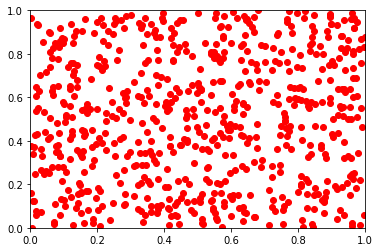

In [ ]:
#Importamos la libreria para graficar
import matplotlib.pyplot as plt
#En las dos listas cada elemento se pone sobre n
lista1=[i/10000 for i in lista]
lista2=[i/10000 for i in lista]
#A la lista1 se le elimina la posicion 0
del lista1[0]
#A la lista2 se le elimina el ultimo elemento
del lista2[-1]
#Se grafica la lista 1 y 2 con los respectivos puntos en vez de lineas
plt.plot(lista1,lista2,'ro')
#Se declara los valores que toma cada eje
plt.axis([0, 1, 0, 1])
plt.show()

***Pruebas del generador de números aleatorios de Excel***

Usando la función rand() de excel, generar 20 observaciones de números aleatorios. Esta muestra es de menor tamaño que la muestra anterior por lo cual, para probar si estos números se distribuyen de manera uniforme, se puede realizar una prueba de Kolmogorov Smirnov.

*   Graficar la función acumulada empírica con base en la muestra y compararla con la función acumulada teórica (uniforme)
*   Calcular las diferencias entre la distribución empírica y teórica (D-,D+) 
*   Calcular el estadístico de prueba
*   Comparar con el valor crítico del estadístico

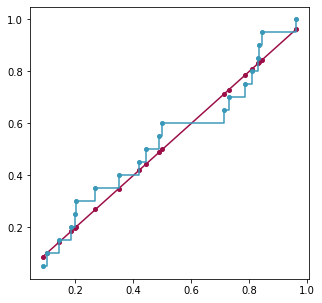


Diferencia absoluta D+ = 0.10574066798490256
Diferencia absoluta D- = -0.055740667984902625
Estadístico de prueba D = 0.10574066798490256
Estadístico crítico Dalpha = 0.29408 > 0.10574066798490256 : no se puede rechazar H0


In [ ]:
from pandas._libs.tslibs.period import DIFFERENT_FREQ
import random
#Obtenemos la muestra a partir de numeros aleatorios entre 0 y 1
lista = [random.random() for i in range(20)]
#Ordenamos la lista con el metodo sort
lista.sort()
#Nuestro eje x va a ser igual a la lista que tenemos
x= lista
#El eje y sera cada uno de los elementos divididos en el n(20)
y=[i/20 for i in range(1,21)]
#Construimos la grafica
fig, axes = plt.subplots(figsize=(5,5))
axes.plot(x,x,color="#9C0F48",marker="o",markersize=4)
plt.plot(x,y,color="#3A98B9",drawstyle='steps-post',linestyle="-",marker="o",markersize=4)
plt.show()
#Obtenemos el D- y D+ con las formulas vistas en clase
difMax = max([i/20 - lista[i-1] for i in range(1,21)])
difMin = min([lista[i-1] - (i-1)/20 for i in range(1,21)])

print('\nDiferencia absoluta D+ =',difMax)
print('Diferencia absoluta D- =',difMin)
#Se saca el maximo entre D- y D+ para obtener el estadistico de prueba
dif = max(difMax,difMin)
print('Estadístico de prueba D =',dif)
#Obtenemos el teorico de la tabla con un 95% de significancia 
d_teo=0.29408
if d_teo < dif:
  print("Estadístico crítico Dalpha =",d_teo, "<" , dif, ": rechazar H0")
else:
  print("Estadístico crítico Dalpha =",d_teo, ">" , dif, ": no se puede rechazar H0")